# Compare SWE Reanalysis to ASO:

In [1]:
import pandas as pd
import numpy as np
import rioxarray as rxr
import xarray as xr
import matplotlib.pyplot as plt
import altair as alt
import geopandas as gpd
import pickle
import rasterio as rio
import altair as alt
import pickle

In [7]:
def calculate_difference(lidar_fn, aso_poly_fn, year):

    # Load in the data:
    aso = rxr.open_rasterio(lidar_fn, mask_and_scale=True).squeeze()
    aso_poly = gpd.read_file('../data/misc/conejos_outline.geojson')
    ds = xr.open_dataset('../data/reanalysis/SWE_reanalysis_32yrs.nc')
    
    # clip the reanalysis data:
    ds_clip = ds.rio.clip(aso_poly.to_crs('epsg:4326').geometry)
    
    # reproject and match the resolution of the ASO data to that of the reanalysis:
    aso_match = aso.rio.reproject_match(ds_clip, resampling = rio.enums.Resampling.cubic)

    # Calculate the difference between ASO and Reanalysis:
    aso_re_dif = ds_clip.SWE_Post[year - 1990] - aso_match

    # Plot the difference:
    aso_re_dif.plot()

    return aso_re_dif

In [8]:
lidar_fn = '../data/aso_lidar/conejos_lidar/ASO_50M_SWE_USCOCJ_20160403.tif'
aso_poly_fn = '../data/misc/conejos_outline.geojson'
year = 2016

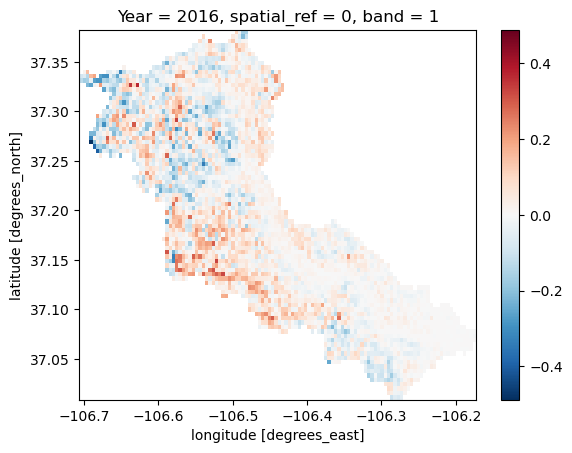

In [10]:
conejos_dif_2016 = calculate_difference(lidar_fn, aso_poly_fn, year)

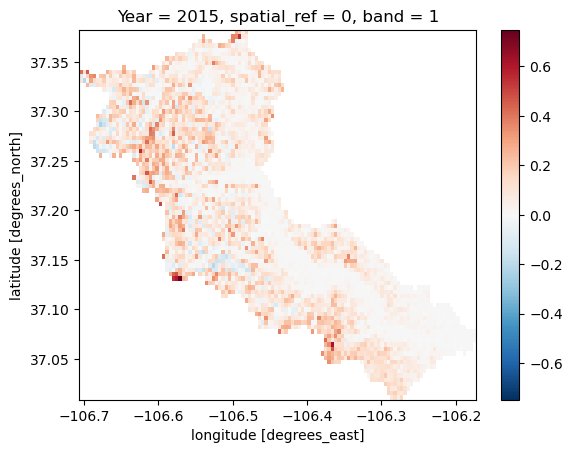

In [11]:
lidar_fn = '../data/aso_lidar/conejos_lidar/ASO_50M_SWE_USCOCJ_20150406.tif'
aso_poly_fn = '../data/misc/conejos_outline.geojson'
year = 2015

conejos_dif_2015 = calculate_difference(lidar_fn, aso_poly_fn, year)